In [8]:
import prepare as p
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import acquire as a
import prepare as p
import statsmodels.api as sm

In [2]:
df = p.acquire_store()

In [3]:
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [4]:
df = p.organize(df)

In [5]:
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221


In [9]:
p.add_cols(df)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,weekday,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,January,Tuesday,294.00
...,...,...,...,...,...,...,...,...,...
2017-12-31,21,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,735 SW Military Dr,78221,December,Sunday,87.57
2017-12-31,32,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,8503 NW Military Hwy,78231,December,Sunday,133.44
2017-12-31,55,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,12125 Alamo Ranch Pkwy,78253,December,Sunday,285.45


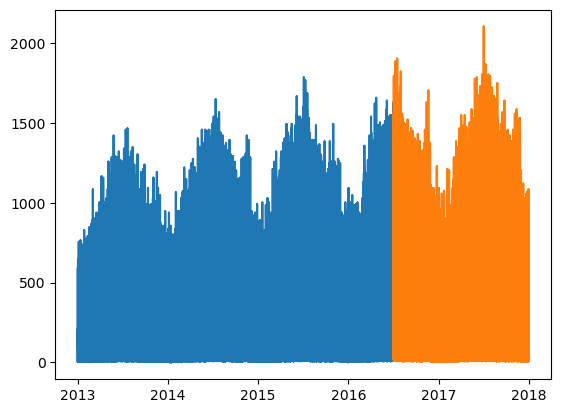

In [12]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index]
test = df[test_start_index:]

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

<AxesSubplot:>

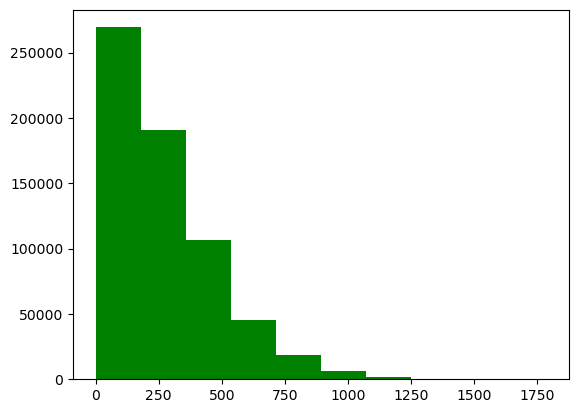

In [16]:
train.sales_total.hist(color = 'green', grid = False)

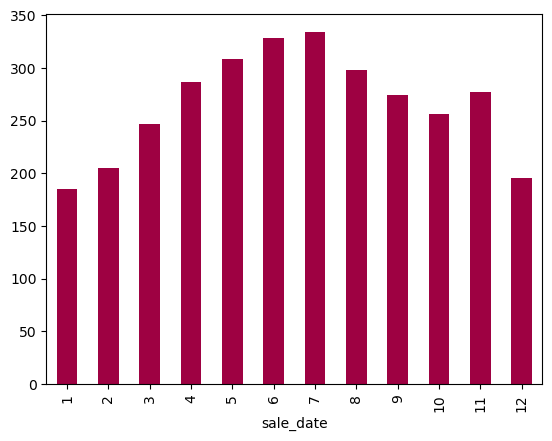

In [23]:
month_df = train.groupby(train.index.month)['sales_total'].mean().plot.bar(colormap = 'Spectral')

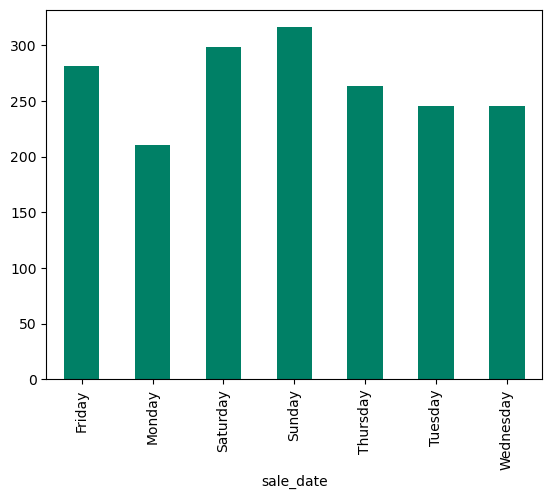

In [29]:
month_df = train.groupby(train.index.day_name())['sales_total'].mean().plot.bar(colormap = 'summer')

In [35]:
train_no_zip = train.drop(columns = 'store_zipcode')

<AxesSubplot:xlabel='sale_date'>

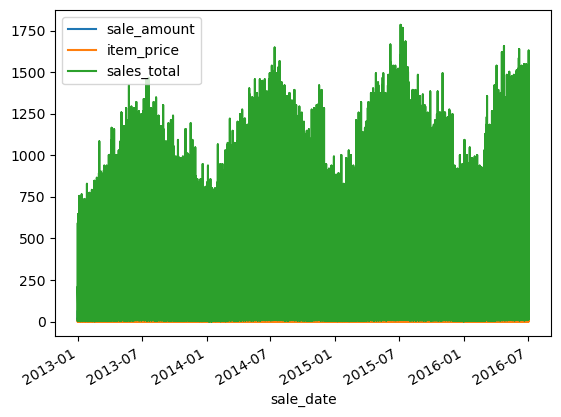

In [36]:
train_no_zip.plot()

<AxesSubplot:xlabel='sale_date'>

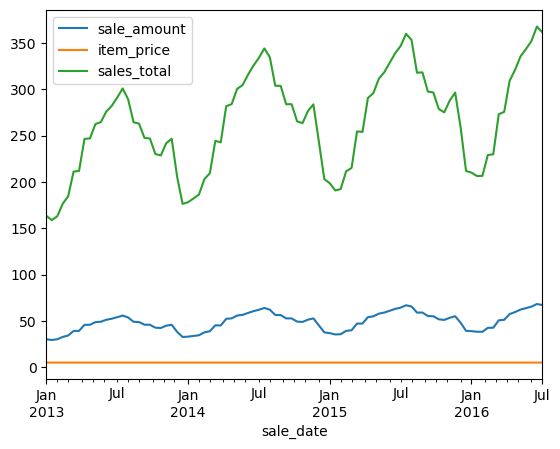

In [37]:
train_no_zip.resample('2W').mean().plot()

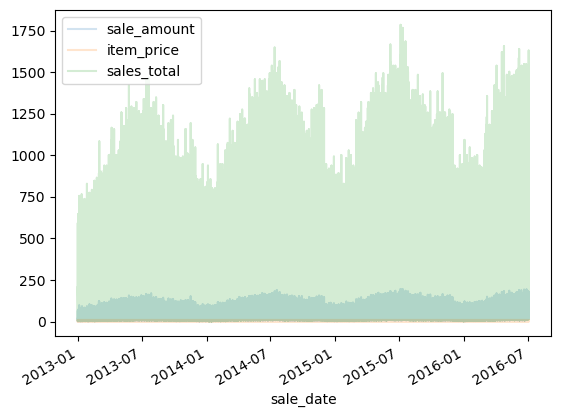

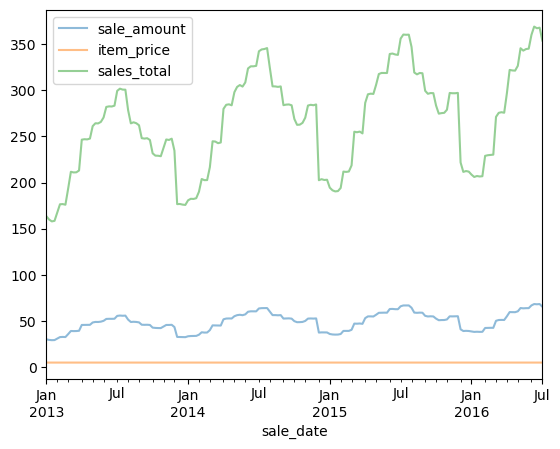

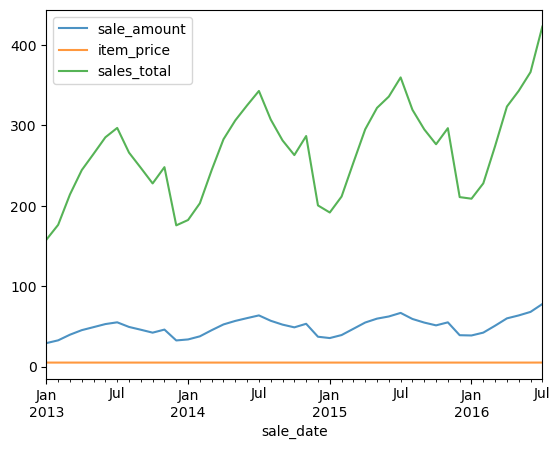

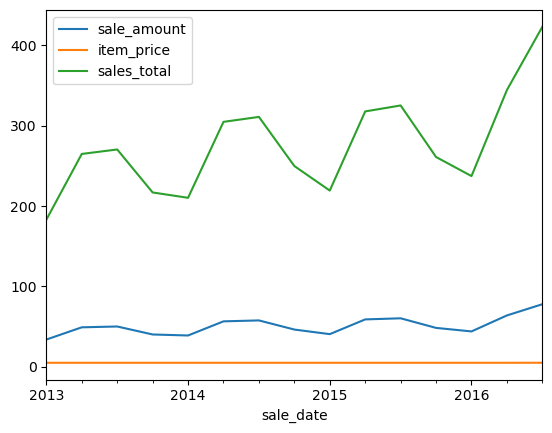

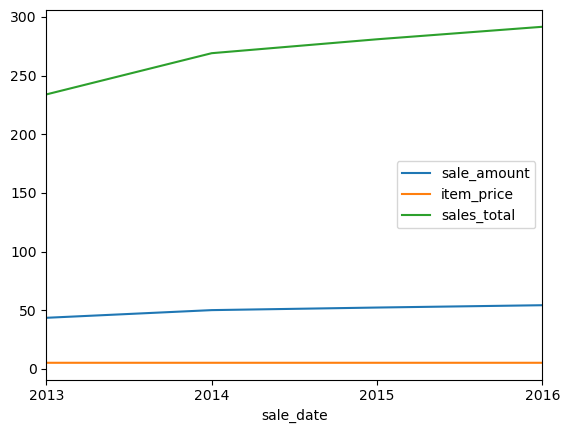

In [42]:
train_no_zip.plot(alpha = .2, label = 'Hourly')
train_no_zip.resample('W').mean().plot(alpha=.5, label='Daily')
train_no_zip.resample('M').mean().plot(alpha=.8, label='Weekly')
train_no_zip.resample('Q').mean().plot(label='Monthly')
train_no_zip.resample('Y').mean().plot(label='Yearly')
plt.legend()
plt.show()

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

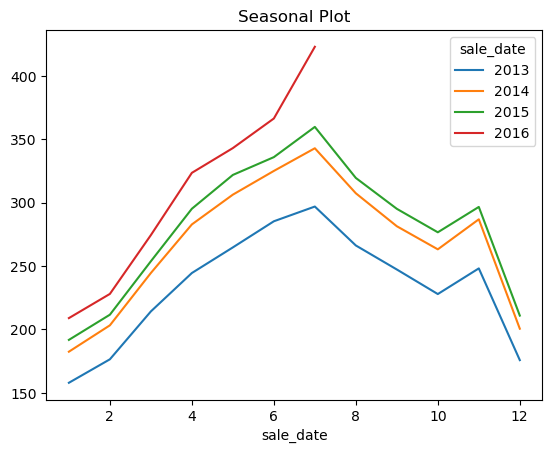

In [44]:
train_no_zip.groupby([train_no_zip.index.year, train_no_zip.index.month])['sales_total'].mean().unstack(0).plot(title='Seasonal Plot')


<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

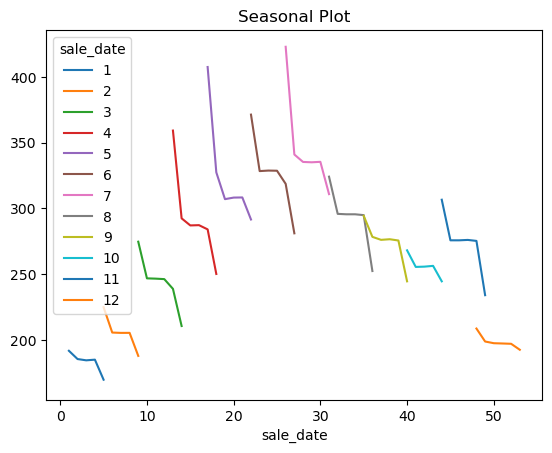

In [45]:
train_no_zip.groupby([train_no_zip.index.month, train_no_zip.index.week])['sales_total'].mean().unstack(0).plot(title='Seasonal Plot')


Text(0.5, 1.0, 'Lag plot with lag=1')

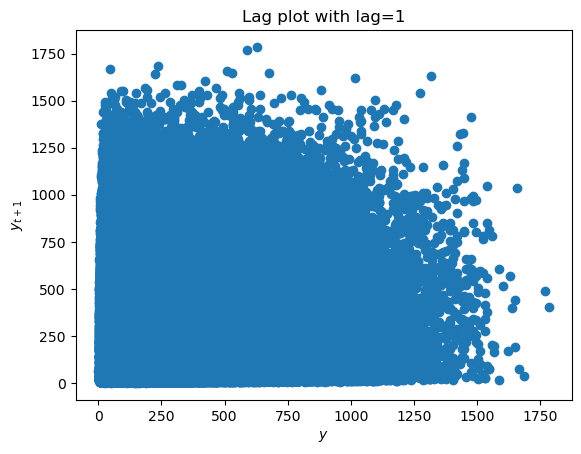

In [46]:
plt.scatter(train_no_zip.sales_total, train_no_zip.sales_total.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

,sale_amount,item_price,this_week,1_month_out
sale_date,,,,
2013-01-31,29.348645,5.16040,157.894723,176.411855
2013-02-28,32.815500,5.16040,176.411855,214.181650
2013-03-31,39.831097,5.16040,214.181650,244.460082
2013-04-30,45.484933,5.16040,244.460082,264.663123
2013-05-31,49.241419,5.16040,264.663123,285.261279
2013-06-30,53.039800,5.16040,285.261279,296.881241
2013-07-31,55.220774,5.16040,296.881241,266.183375
2013-08-31,49.468452,5.16040,266.183375,247.237694
2013-09-30,45.993800,5.16040,247.237694,227.868064


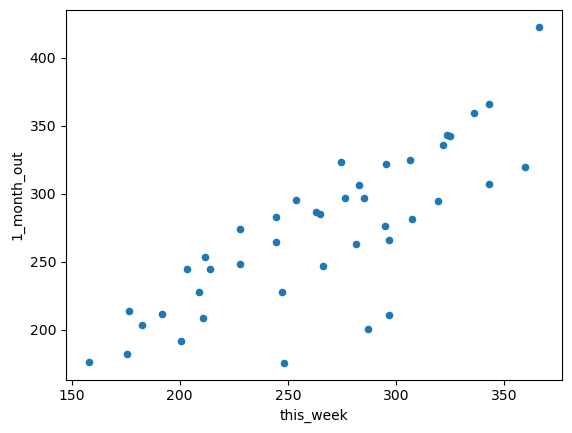

In [48]:
monthly = train_no_zip.resample('M').mean()
monthly['1_month_out'] = monthly.sales_total.shift(-1)
monthly = monthly.rename(columns={'sales_total': 'this_week'})
monthly.plot.scatter(x = 'this_week', y = '1_month_out')
monthly

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

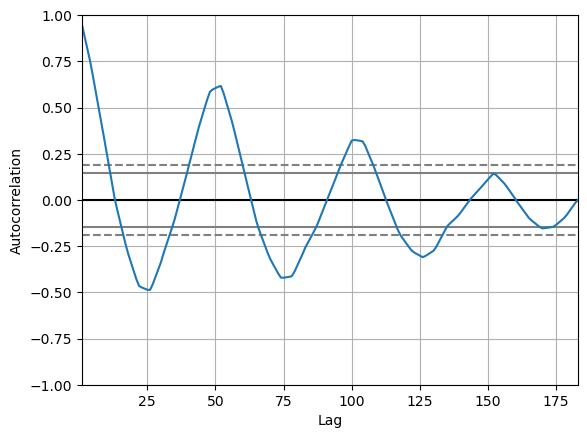

In [53]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())
